In [ ]:
!pip install control


In [ ]:
import control as co
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
plt.rcParams['font.size']=24
plt.rcParams['figure.figsize']=[20,10]
#Providing numerator and denominator polynomial
G1=co.tf([2,5],[1,2,3])
print(G1)


   2 s + 5
-------------
s^2 + 2 s + 3



In [ ]:
#Providing Gain, zero and poles to get transfer function
G2=5*co.tf(np.poly([-2,-5]),np.poly([-4,-5,-9]))
print(G2)


    5 s^2 + 35 s + 50
--------------------------
s^3 + 18 s^2 + 101 s + 180



In [ ]:
#For Pole-Zero cancellation
print(co.minreal(G2))

1 states have been removed from the model

   5 s + 10
---------------
s^2 + 13 s + 36



In [ ]:
#Standard transfer functions Alzebra:
G3=G1+G2
print(G3)


   7 s^4 + 86 s^3 + 427 s^2 + 1070 s + 1050
----------------------------------------------
s^5 + 20 s^4 + 140 s^3 + 436 s^2 + 663 s + 540



In [ ]:
G4=G1*G2
print(G4)


        10 s^3 + 95 s^2 + 275 s + 250
----------------------------------------------
s^5 + 20 s^4 + 140 s^3 + 436 s^2 + 663 s + 540



In [ ]:
G5=G1/G2
print(G5)


2 s^4 + 41 s^3 + 292 s^2 + 865 s + 900
--------------------------------------
5 s^4 + 45 s^3 + 135 s^2 + 205 s + 150



**control.feedback(*sys1*, *sys2=1*, *sign=-1*)**

Feedback interconnection between two I/O systems.

Parameters:	
sys1 (scalar, StateSpace, TransferFunction, FRD) – The primary process.
sys2 (scalar, StateSpace, TransferFunction, FRD) – The feedback process (often a feedback controller).

sign (scalar) – The sign of feedback. sign = -1 indicates negative feedback, and sign = 1 indicates positive feedback. sign is an optional argument; it assumes a value of -1 if not specified.

Returns:out(StateSpace or TransferFunction)

In [ ]:
G6=co.feedback(G1,G2)
print(G6)


    2 s^4 + 41 s^3 + 292 s^2 + 865 s + 900
----------------------------------------------
s^5 + 20 s^4 + 150 s^3 + 531 s^2 + 938 s + 790



In [ ]:
#Getting Gain, poles & zero location of transfer function:
print(co.dcgain(G6))

1.139240506329114


In [ ]:
print(co.pole(G6))

[-7.04718677+0.j         -5.0969239 +0.j         -5.        +0.j
 -1.42794466+1.53615211j -1.42794466-1.53615211j]


In [ ]:
print(co.zero(G6))

[-9.  -5.  -4.  -2.5]


Transfer function to state space

In [ ]:
G1_ss=co.tf2ss(G1)
print(G1_ss)

A = [[-2. -3.]
     [ 1.  0.]]

B = [[1.]
     [0.]]

C = [[2. 5.]]

D = [[0.]]



In [ ]:
G1_tf=co.ss2tf(G1_ss)
print(G1_tf)


   2 s + 5
-------------
s^2 + 2 s + 3



In [ ]:
A=[[0,1,0],[0,0,1],[-1,-2,-3]]
B=[[0],[0],[1]]
C=[1,0,0]
D=0
sys=co.ss(A,B,C,D)

In [ ]:
sys_tf=co.ss2tf(sys)
print(sys_tf)


8.882e-16 s^2 + 8.882e-16 s + 1
-------------------------------
     s^3 + 3 s^2 + 2 s + 1



Impulse response of a system

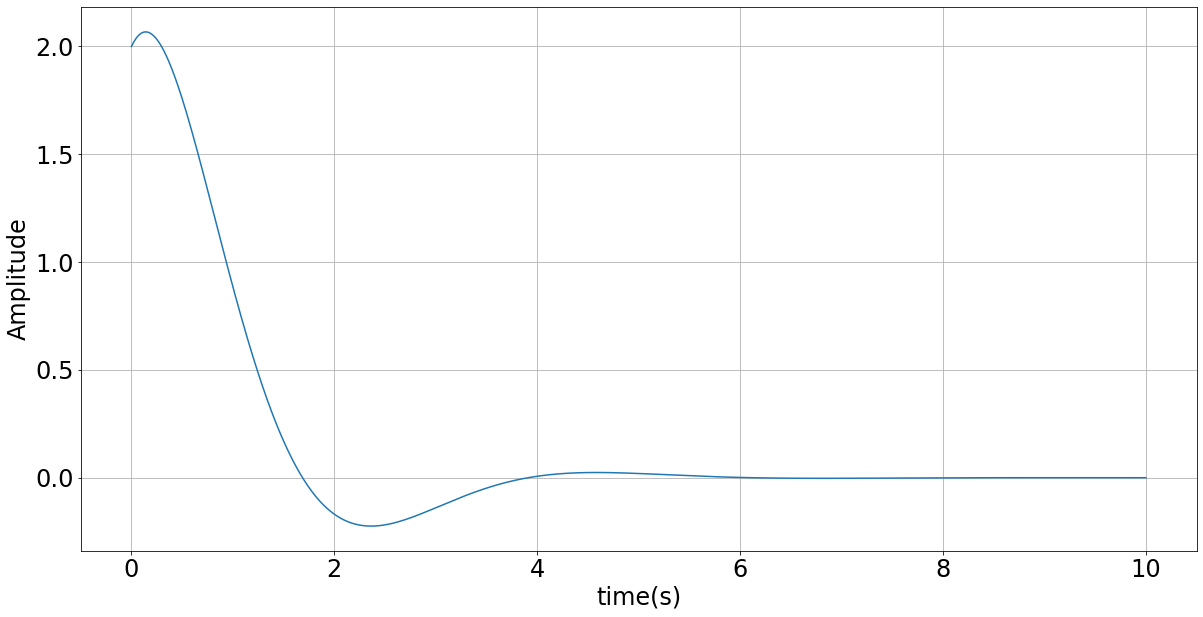

In [ ]:
t=np.linspace(0,10,1000)
t1,y1=co.impulse_response(G1,t)
plt.plot(t1,y1)
plt.xlabel('time(s)')
plt.ylabel('Amplitude')
plt.grid()

Step response of a system

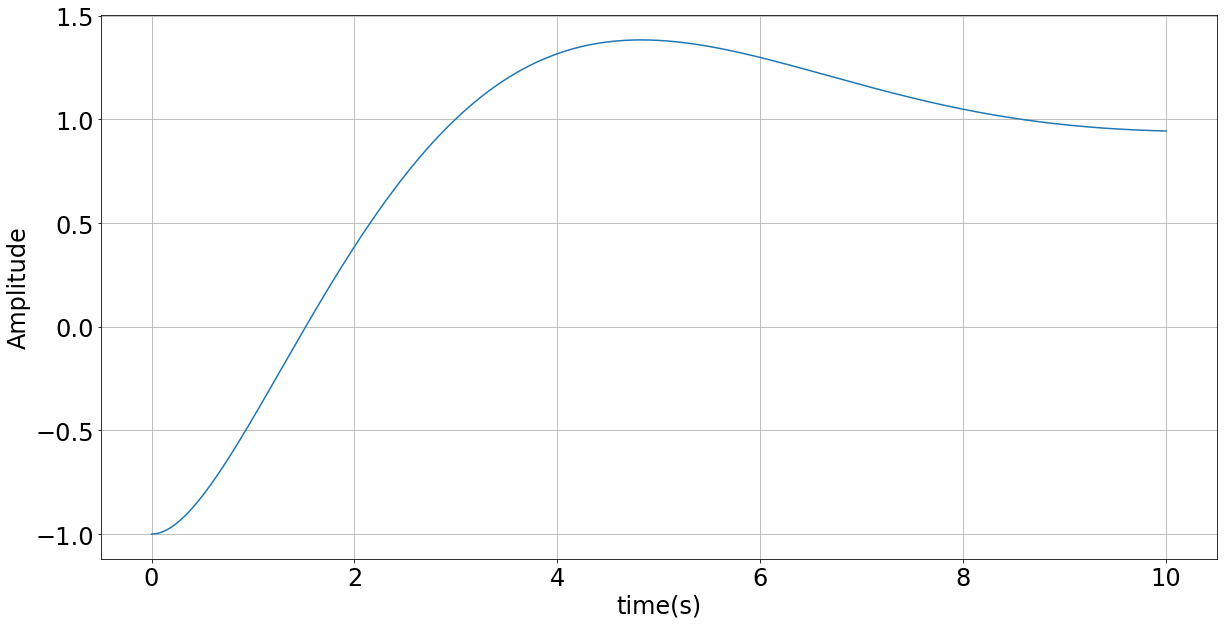

In [ ]:
t=np.linspace(0,10,1000)
t1,y1=co.step_response(sys,t,[-1,0,2])
plt.plot(t1,y1)
plt.xlabel('time(s)')
plt.ylabel('Amplitude')
plt.grid()

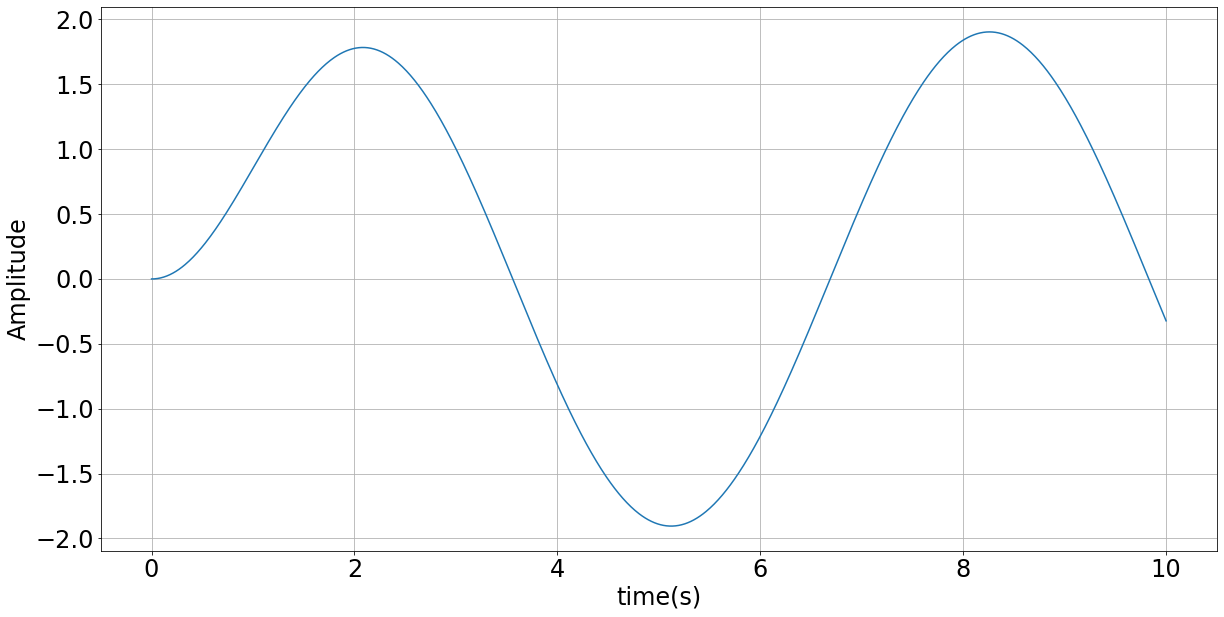

In [ ]:
#To get time response of an arbitrary input
t=np.linspace(0,10,1000)
u=np.sin(t)
#Initial condition is optional here
t1,y1=co.forced_response(G1,t,u) 
plt.plot(t1,y1)
plt.xlabel('time(s)')
plt.ylabel('Amplitude')
plt.grid()

Frequency domain analysis

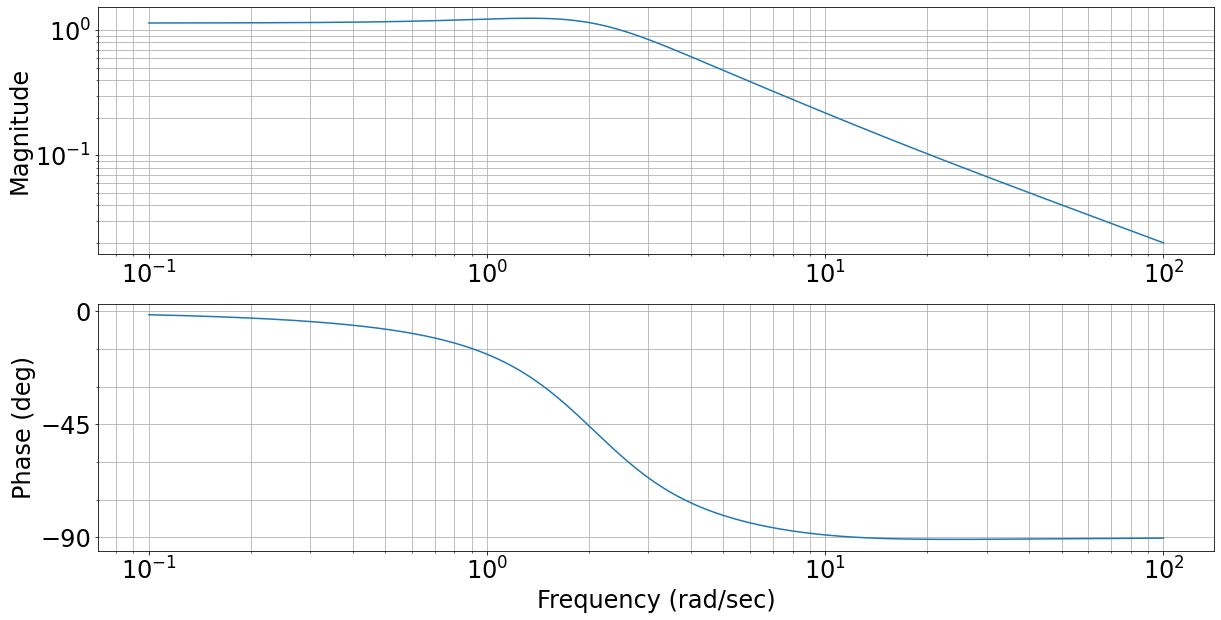

In [ ]:
co.bode_plot(G6);

0

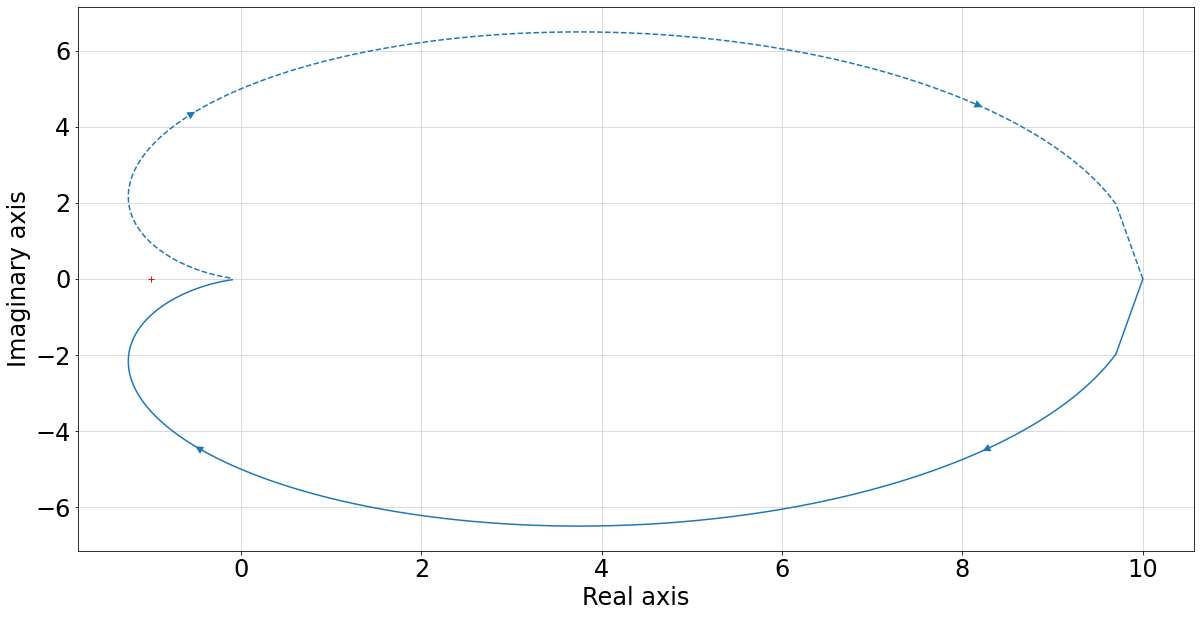

In [ ]:

G=co.tf([10],[1,2,1])
co.nyquist_plot(G)

In [ ]:
#To get the stability margins with transfer function
G8=co.tf([10],np.poly([-1,-2,-3]))
GM,PM,c,PCF,GCF,f=co.stability_margins(G8)
print(f'GM={GM}, PM={PM}, PCF={PCF}, GCF={GCF}')

GM=6.0, PM=90.0, PCF=3.3166247903554, GCF=1.0


In [ ]:
G9=co.tf([1],[1,4,5,0])
print(G9)


        1
-----------------
s^3 + 4 s^2 + 5 s



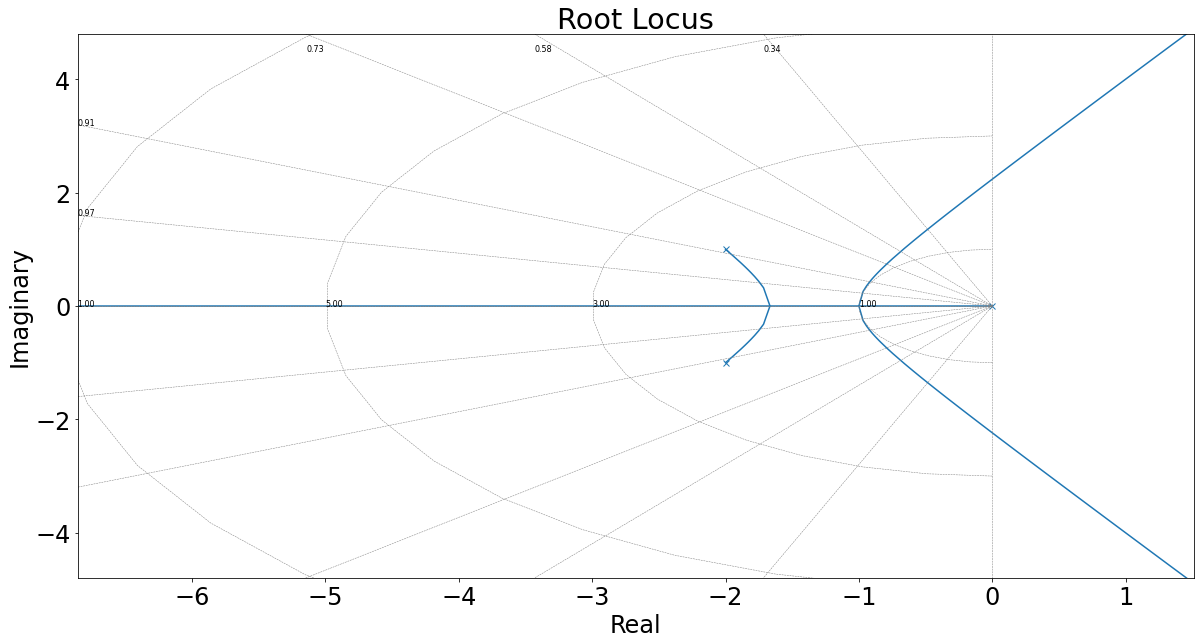

In [ ]:
co.root_locus(G9);

A=System Matrix,
B=Input Matrix,
C=Output Matrix,
D=Feed through Matrix


The state controllability condition implies that it is possible – by admissible inputs – to steer the states from any initial value to any final value within some finite time window

Controllability Matrix=[B , AB , A^2B , ...]

In [ ]:
M=co.ctrb(A,B)
print(M)

[[ 0.  0.  1.]
 [ 0.  1. -3.]
 [ 1. -3.  7.]]


In [ ]:
np.linalg.matrix_rank(M)

3

Observability is a measure for how well internal states of a system can be inferred by knowledge of its external outputs.

Observability matrix=[C , CA, CA^2, ...]

In [ ]:
N=co.obsv(A,C)

In [ ]:
np.linalg.matrix_rank(N)

3

Pole placement(Linear state variable feedback) : Full state feedback (FSF), or pole placement, is a method employed in feedback control system theory to place the closed-loop poles of a plant in pre-determined locations in the s-plane.

In [ ]:
np.linalg.eigvals(A)

array([-2.32471796+0.j        , -0.33764102+0.56227951j,
       -0.33764102-0.56227951j])

Place closed loop eigenvalues to desired location
It will return Gain Matrix K

In [ ]:
co.place(A,B,[-1,-2,3])

array([[-7., -9., -3.]])

Cannonical forms

In [ ]:
Desired_can_form,Transformation_matrix=co.canonical_form(sys,form='reachable')
print(f'Desired_can_form={Desired_can_form}')

Desired_can_form=A = [[-3. -2. -1.]
     [ 1.  0.  0.]
     [ 0.  1.  0.]]

B = [[1.]
     [0.]
     [0.]]

C = [[0. 0. 1.]]

D = [[0.]]

